<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


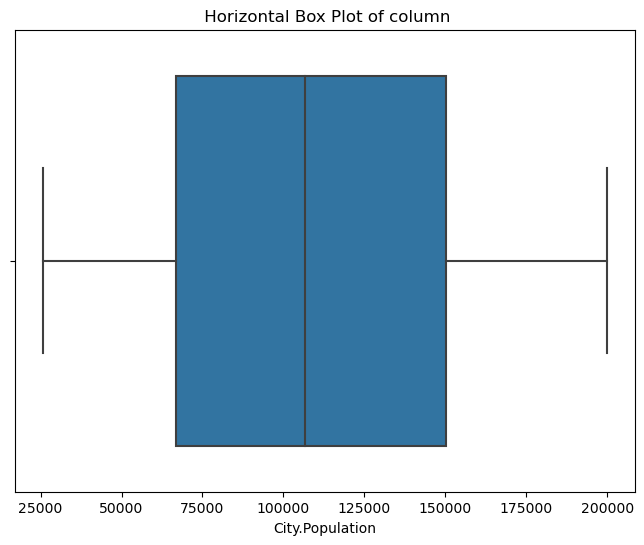

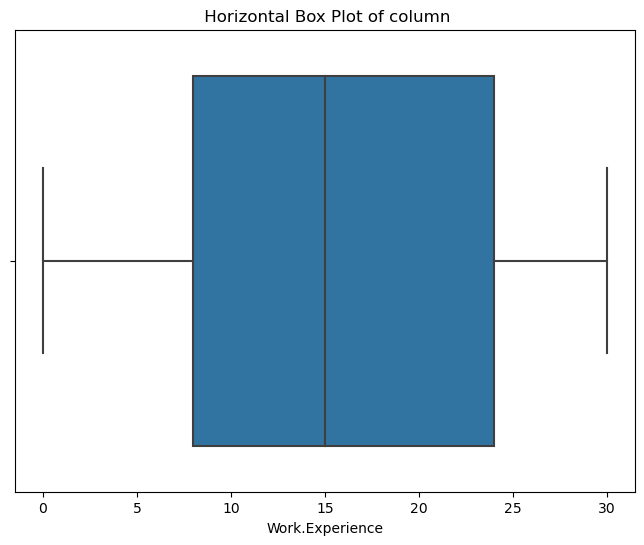

    Undergrad Marital.Status Taxable.Income  City.Population  Work.Experience  \
0          NO         Single           Good            50047               10   
1         YES       Divorced           Good           134075               18   
2          NO        Married           Good           160205               30   
3         YES         Single           Good           193264               15   
4          NO        Married           Good            27533               28   
..        ...            ...            ...              ...              ...   
595       YES       Divorced           Good            39492                7   
596       YES       Divorced           Good            55369                2   
597        NO       Divorced           Good           154058                0   
598       YES        Married           Good           180083               17   
599        NO       Divorced           Good           158137               16   

    Urban  
0     YES  
1  

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10048\926088092.py:48: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()
C:\Users\bhanu\AppData\Local\Temp\ipykernel_10048\926088092.py:49: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.kurt()
C:\Users\bhanu\AppData\Local\Temp\ipykernel_10048\926088092.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Training Accuracy Score: 0.851
Testing Accuracy Score: 0.733
Number of nodes : 73
level of depth : 9
Training Accuracy Score: 0.827
Test Accuracy Score: 0.78
Training Accuracy Score: 1.0
Test Accuracy Score: 0.613


E:\ANACONDA\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Users\\bhanu\\OneDrive\\Desktop\\data science assesments\\Fraud_check.csv")
df
df.shape
df.info()

# --> for y variable
df["Taxable.Income"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")
Y = df["Taxable.Income"]
Y

# EDA
#-->BOXPLOT
import seaborn as sns
import matplotlib.pyplot as plt
data = ['City.Population','Work.Experience']
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

#removing the ouliers
import seaborn as sns
import matplotlib.pyplot as plt
# List of column names with continuous variables
continuous_columns = ['City.Population','Work.Experience']
# Create a new DataFrame without outliers
data_without_outliers = df.copy()
for column in continuous_columns:
    Q1 = data_without_outliers[column].quantile(0.25)
    Q3 = data_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_whisker) & (data_without_outliers[column] <= upper_whisker)]

# Print the cleaned data without outliers
print(data_without_outliers)
df1 = data_without_outliers
df1

print(df1.shape)
print(df1.info())

# constructing histogram and calculating skeweedness, kurtosis
df1.hist()
df1.skew()
df1.kurt()
df1.describe()

# data transformation
# --> for x variable
X_trans = df.iloc[:,[3,4]]
X_trans
list(X_trans)
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X_trans)
SS_X
X1 = pd.DataFrame(SS_X)
X1.columns = list(X_trans)
X1

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X2 = df[df.columns[[0,1,5]]]
X2
X2.iloc[:,0] = LE.fit_transform(X2.iloc[:,0])
X2
X2.iloc[:,1] = LE.fit_transform(X2.iloc[:,1])
X2
X2.iloc[:,2] = LE.fit_transform(X2.iloc[:,2])
X2

# defining X and Y 
X = pd.concat([X1,X2],axis=1)
X
Y1 = df['Taxable.Income']
Y1

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y1)
Y

# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=10)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',max_depth=9)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_train
Y_pred_test = DT.predict(X_test)
Y_pred_test

#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing Accuracy Score:",ac2.round(3)) 
# --> Training Accuracy Score: 0.851 , Testing Accuracy Score: 0.733

#-->visuvalisation of the tree (can be executed in google colab)
'''
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph
'''
print("Number of nodes :",DT.tree_.node_count)
print("level of depth :",DT.tree_.max_depth)
#Number of nodes : 73
#level of depth : 9

# Parallel Ensemble Methods
# --> Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=7,
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=123)    
RF.fit(X_train,Y_train)
Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)

#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))  
# --> Training Accuracy Score: 0.827, Test Accuracy Score: 0.78

# Sequential Ensemble Methods
# --> Ada Boost 
from sklearn.ensemble import AdaBoostClassifier
ABR = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100,
                         learning_rate=0.001,random_state=123)
ABR.fit(X_train,Y_train)
Y_pred_train = ABR.predict(X_train)
Y_pred_test = ABR.predict(X_test)

#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))   
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))
# -->Training Accuracy Score: 1.0, Test Accuracy Score: 0.613

# "Grid search CV"
import numpy as np
from  sklearn.model_selection import GridSearchCV
parameter_test = {'n_estimators':range(100,300,100),'learning_rate':np.arange(0.001,0.1,0.001)}

search_bestparameter = GridSearchCV(estimator = AdaBoostClassifier(),param_grid = parameter_test,scoring='accuracy',cv=5)
#cv means cross validiting complete process here it is validating 5 times because we gave 5

search_bestparameter.fit(X,Y) #we need to give the complete data here

import numpy as np
np.sqrt(abs(search_bestparameter.best_score_))
search_bestparameter.best_params_
#{'learning_rate': 0.001, 'n_estimators': 100}